# Import Packages

In [ ]:
#install numpy version<2.0
!pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# Installation avec des versions spécifiques et compatibles
!pip install torch==2.0.0
!pip install torchdata==0.6.0
!pip install dgl==1.0.1 -f https://data.dgl.ai/wheels/repo.html
!pip install pyvista==0.39.0
!pip install networkx==3.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import torch
import pandas as pd
import pyvista as pv
import networkx as nx
import glob
import time
import sys
import dgl
import dgl.data
import os
import dgl.dataloading
#import tqdm
import matplotlib.pyplot as plt

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.5 MB/s eta 0:00:00


In [ ]:
df_log = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Training/logs.parquet', engine='fastparquet')
print(df_log)

            wellName   DEPTH        GR
1        512320698.0   421.0   96.9752
2        512320698.0   421.5  102.3324
3        512320698.0   422.0  104.6432
4        512320698.0   422.5   99.2187
5        512320698.0   423.0   92.0200
...              ...     ...       ...
9650828  512336327.0  7187.5  780.6628
9650829  512336327.0  7188.0  798.1260
9650830  512336327.0  7188.5  808.1805
9650831  512336327.0  7189.0  810.6509
9650832  512336327.0  7189.5  809.3961

[7698162 rows x 3 columns]


In [ ]:
#We first create downsample the gamma rays to per feet.
df_log = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Training/logs.parquet', engine='fastparquet')
#df_log = df_log.set_index('wellName')
df_log.loc[df_log['GR'] < -1, 'GR' ] = -1
df_loc = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Training/loc.parquet', engine='fastparquet')
df_loc = df_loc.reset_index()
df_log = df_loc.merge(df_log, how = 'inner', left_on = 'wellName', right_on = 'wellName')
print(df_log.head())

      wellName   Latitude  Longitude  DEPTH        GR
0  512320698.0  48.673353   2.145178  421.0   96.9752
1  512320698.0  48.673353   2.145178  421.5  102.3324
2  512320698.0  48.673353   2.145178  422.0  104.6432
3  512320698.0  48.673353   2.145178  422.5   99.2187
4  512320698.0  48.673353   2.145178  423.0   92.0200


In [ ]:
df_tops = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Training/tops.parquet', engine='fastparquet')
cols = ['MARCEL','CONRAD', 'SYLVAIN']
df_tops = df_tops[cols]
df_tops.dropna(inplace = True)
df_tops.head()

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512320698.0,6398.0,6661.0,6638.0
512320699.0,6407.0,6676.0,6656.0
512320928.0,6520.0,6793.0,6746.0
512320970.0,6544.0,6816.0,6770.0
512320971.0,6510.0,6789.0,6742.0


# Create Graphs

- node: wells
- feature: altitude, longitude, gamma ray list

In [ ]:
# get a list to make sure wells are at the same time in df_logs and df_tops
well_list=df_log['wellName'].unique().astype(int)
well_list=set(list(df_tops.index)).intersection(set(well_list))
well_list=list(well_list)
well_list = well_list[:100]  # limit the nodes in graph because of limited computing resources

well_list

[512329746.0,
 512331798.0,
 512325663.0,
 512325664.0,
 512331808.0,
 512331809.0,
 512331827.0,
 512331828.0,
 512331829.0,
 512331842.0,
 512331852.0,
 512331856.0,
 512331859.0,
 512331861.0,
 512331862.0,
 512325725.0,
 512325739.0,
 512325741.0,
 512325749.0,
 512325750.0,
 512331895.0,
 512331896.0,
 512325752.0,
 512325753.0,
 512325754.0,
 512325764.0,
 512325765.0,
 512325766.0,
 512325771.0,
 512325773.0,
 512325785.0,
 512325801.0,
 512325803.0,
 512325808.0,
 512325809.0,
 512325810.0,
 512325824.0,
 512325826.0,
 512325829.0,
 512323782.0,
 512325830.0,
 512325831.0,
 512334023.0,
 512334042.0,
 512334043.0,
 512329968.0,
 512329969.0,
 512325881.0,
 512325883.0,
 512325884.0,
 512329990.0,
 512325907.0,
 512325908.0,
 512325909.0,
 512325910.0,
 512325911.0,
 512325912.0,
 512325913.0,
 512323894.0,
 512323895.0,
 512323900.0,
 512325950.0,
 512323903.0,
 512323904.0,
 512325951.0,
 512323910.0,
 512323911.0,
 512323912.0,
 512323913.0,
 512323914.0,
 512323917.0,
 51232

In [ ]:
df_log_valide=df_log[df_log['wellName'].isin(well_list)]
df_log_valide

,wellName,Latitude,Longitude,DEPTH,GR
948777,512323782.0,48.784103,2.092008,496.0,91.0983
948778,512323782.0,48.784103,2.092008,496.5,90.3871
948779,512323782.0,48.784103,2.092008,497.0,89.9989
948780,512323782.0,48.784103,2.092008,497.5,90.5575
948781,512323782.0,48.784103,2.092008,498.0,93.3313
...,...,...,...,...,...
7654400,512334043.0,48.655623,2.221548,6886.5,172.6563
7654401,512334043.0,48.655623,2.221548,6887.0,168.3046
7654402,512334043.0,48.655623,2.221548,6887.5,159.9968
7654403,512334043.0,48.655623,2.221548,6888.0,154.6122


In [ ]:
print("The number of validated well：", df_log_valide["wellName"].nunique())

唯一井数量： 100


In [ ]:
df_tops_valide=df_tops.loc[well_list]
df_tops_valide

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512329746.0,6635.0,6916.0,6884.0
512331798.0,6245.0,6500.0,6476.0
512325663.0,6478.0,6783.0,6758.0
512325664.0,6504.0,6795.0,6771.0
512331808.0,6284.0,6541.0,6516.0
...,...,...,...
512324019.0,6575.0,6880.0,6834.0
512324021.0,6570.0,6858.0,6814.0
512330168.0,6351.0,6622.0,6597.0


In [ ]:
# for each marker, create a graph
# node: well
# feature: altitude, latitude, corresponding gammaray list for changng point
# the input should be clean adn valide df_logs and df_tops, which means the wells should exist at the same time in 2 files
def create_graph_marker(df_log,df_tops,marker):
  ## for getting marker
  df_marker_depth=df_tops[marker]

  ### for altitude and longitude
  well_features=df_log[['wellName','Latitude','Longitude']].drop_duplicates()
  well_features.reset_index(inplace=True)
  well_features.drop('index',axis=1,inplace=True)


  ## for gamma ray
  gr_features=[]
  counter=0
  for well in well_list:
    marker=df_marker_depth.loc[well]
    marker_gr=df_log[(df_log['DEPTH'] == marker) & (df_log['wellName'] == well)]['GR'].values
    gamma_ray=list(df_log_valide[df_log_valide['wellName']==well]['GR'])
    gamma_ray = [gr for gr in gamma_ray if marker_gr - 50 <= gr <= marker_gr + 50]
    gr_features.append(gamma_ray)



  num_nodes=len(df_tops.index)
  # Create edge list for a linear graph
  src = list(range(num_nodes - 1))
  dst = list(range(1, num_nodes))

  # Create a graph with the edge list
  g = dgl.graph((src, dst))
  # Add self-loops
  g = dgl.add_self_loop(g)

  #features is a tensor (usually a 2D tensor, where each row corresponds to a node)
  ## Latitude	and Longitude
  latitude=torch.tensor(well_features['Latitude'].values, dtype=torch.float32)
  longitude=torch.tensor(well_features['Longitude'].values, dtype=torch.float32)

  ##how to set the length of tensor? torch.tensor function expects a sequence of sequences with the same length when creating a tensor.
  # Find the maximum length of gamma-ray sequences
  # max_len = max(len(seq) for seq in gr_features)
  max_len = 128  # fixed length

  # Pad the sequences to the maximum length
  padded_gr_features = [(seq + [0] * (max_len - len(seq)))[:max_len] for seq in gr_features]

  # Now create the tensor using the padded sequences
  gamma_ray = torch.tensor(padded_gr_features, dtype=torch.float32)


  g.ndata['Latitude'] = latitude
  g.ndata['Longitude'] = longitude
  g.ndata['GR'] = gamma_ray

  return g


In [ ]:
g_mar=create_graph_marker(df_log_valide,df_tops_valide,'MARCEL')

<ipython-input-13-195aa6539c61>:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  gamma_ray = [gr for gr in gamma_ray if marker_gr - 50 <= gr <= marker_gr + 50]


In [ ]:
g_con=create_graph_marker(df_log_valide,df_tops_valide,'CONRAD')

<ipython-input-13-195aa6539c61>:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  gamma_ray = [gr for gr in gamma_ray if marker_gr - 50 <= gr <= marker_gr + 50]


In [ ]:
g_syl=create_graph_marker(df_log_valide,df_tops_valide,'SYLVAIN')

<ipython-input-13-195aa6539c61>:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  gamma_ray = [gr for gr in gamma_ray if marker_gr - 50 <= gr <= marker_gr + 50]


# Implement Model

## dataset

In [ ]:
import dgl
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class WellLogMarkerDataset(Dataset):
    def __init__(self, df_log, df_tops, marker, split_ratio=0.8):
        self.train_graph, self.train_label, self.val_graph, self.val_label = self.create_graph_marker(
            marker, df_log, df_tops, split_ratio
        )

    def __len__(self):
        return 2  # two graphs, one for training and one for validation

    def __getitem__(self, idx):
        if idx == 0:
            return self.train_graph, self.train_label
        else:
            return self.val_graph, self.val_label

    def create_graph_marker(self, marker, df_log, df_tops, split_ratio):
        df_marker_depth = df_tops[marker]
        well_list = df_marker_depth.index.tolist()

        well_features = df_log[['wellName', 'Latitude', 'Longitude']].drop_duplicates()
        well_features.set_index('wellName', inplace=True)

        all_data = []

        for well in well_list:
            try:
                marker_depth = df_marker_depth.loc[well]
                marker_gr = df_log[
                    (df_log['DEPTH'] == marker_depth) & (df_log['wellName'] == well)
                ]['GR'].values[0]

                gamma_ray_seq = list(
                    df_log[df_log['wellName'] == well]['GR']
                )
                gamma_ray_seq = [gr for gr in gamma_ray_seq if marker_gr - 50 <= gr <= marker_gr + 50]

                lat = well_features.loc[well]['Latitude']
                lon = well_features.loc[well]['Longitude']

                time_cos = np.cos(2 * np.pi * marker_depth / 100.0)
                time_sin = np.sin(2 * np.pi * marker_depth / 100.0)

                all_data.append({
                    'lat': lat,
                    'lon': lon,
                    'gr': gamma_ray_seq,
                    'label': marker_depth,
                    'time': [time_cos, time_sin]
                })
            except Exception:
                continue

        print(f"Well count for {marker}: {len(all_data)}")

        if len(all_data) < 2:
            raise ValueError("Not enough wells for train/val split.")

        # split wells
        n_train = int(len(all_data) * split_ratio)
        train_data = all_data[:n_train]
        val_data = all_data[n_train:]

        def build_graph(data):
            max_len = 128
            lat = torch.tensor([d['lat'] for d in data], dtype=torch.float32)
            lon = torch.tensor([d['lon'] for d in data], dtype=torch.float32)
            gr = torch.tensor(
                [(d['gr'] + [0] * (max_len - len(d['gr'])))[:max_len] for d in data],
                dtype=torch.float32
            )
            time = torch.tensor([d['time'] for d in data], dtype=torch.float32)
            label = torch.tensor([d['label'] for d in data], dtype=torch.float32)

            num_nodes = len(data)
            src = list(range(num_nodes - 1))
            dst = list(range(1, num_nodes))
            g = dgl.graph((src, dst))
            g = dgl.add_self_loop(g)

            g.ndata['Latitude'] = lat
            g.ndata['Longitude'] = lon
            g.ndata['GR'] = gr
            g.ndata['Time'] = time

            return g, label

        train_g, train_label = build_graph(train_data)
        val_g, val_label = build_graph(val_data)

        return train_g, train_label, val_g, val_label


In [ ]:
# marker_list = ['MARCEL', 'CONRAD', 'SYLVAIN']
dataset_M = WellLogMarkerDataset(df_log_valide, df_tops_valide, 'MARCEL',0.8)

train_graph, train_label = dataset_M[0]
val_graph, val_label = dataset_M[1]

train_loader_M = DataLoader(dataset_M, batch_size=1, collate_fn=lambda batch: batch[0])
val_loader_M = DataLoader(dataset_M, batch_size=1, collate_fn=lambda batch: batch[0])


Well count for MARCEL: 99


In [ ]:
# marker_list = ['MARCEL', 'CONRAD', 'SYLVAIN']
dataset_C = WellLogMarkerDataset(df_log_valide, df_tops_valide, 'CONRAD',0.8)


train_loader_C = DataLoader(dataset_C, batch_size=1, collate_fn=lambda batch: batch[0])
val_loader_C = DataLoader(dataset_C, batch_size=1, collate_fn=lambda batch: batch[0])


Well count for CONRAD: 99


In [ ]:
# marker_list = ['MARCEL', 'CONRAD', 'SYLVAIN']
dataset_S = WellLogMarkerDataset(df_log_valide, df_tops_valide, 'SYLVAIN',0.8)


train_loader_S = DataLoader(dataset_S, batch_size=1, collate_fn=lambda batch: batch[0])
val_loader_S = DataLoader(dataset_S, batch_size=1, collate_fn=lambda batch: batch[0])


Well count for SYLVAIN: 99


## Model Implementation

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
# 定义周期嵌入模块
class PeriodicEmbedding(nn.Module):
    def __init__(self, day_dim=8, time_dim=16, slot_per_day=96):
        super().__init__()
        self.day_embedding = nn.Embedding(7, day_dim)  # 7 days a week
        self.time_embedding = nn.Embedding(slot_per_day, time_dim)  # 96 15-minute time slices per day

    def forward(self, day_idx, time_idx):
        # 输入都是 [num_nodes] 的整数 tensor
        day_emb = self.day_embedding(day_idx)      # 输出 [num_nodes, day_dim]
        time_emb = self.time_embedding(time_idx)   # 输出 [num_nodes, time_dim]
        return torch.cat([day_emb, time_emb], dim=-1)  # 输出 [num_nodes, day_dim + time_dim]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GATConv

# class TemporalEncoder(nn.Module):
#     def __init__(self, input_dim=101, hidden_dim=64):
#         super().__init__()
#         self.conv1 = nn.Conv1d(1, 16, kernel_size=5, padding=2)
#         self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
#         # Instead of hardcoding, calculate the input size dynamically
#         self.fc = nn.Linear(32, hidden_dim)

#     def forward(self, gamma_seq):
#         x = gamma_seq.unsqueeze(1)
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         # Global average pooling across the sequence length
#         x = torch.mean(x, dim=2)
#         return self.fc(x)

class TemporalTransformer(nn.Module):
    def __init__(self, input_len=128, d_model=128, hidden_dim=64, nhead=4, nlayers=2):
        super().__init__()
        self.input_proj = nn.Linear(1, d_model)  # Expand each GR value into a d_model dimension

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=nlayers)
        self.fc = nn.Linear(d_model, hidden_dim)

    def forward(self, x):
        # x shape: [num_nodes, seq_len=128]
        x = x.unsqueeze(-1)              # [num_nodes, 128, 1]
        x = self.input_proj(x)           # [num_nodes, 128, d_model]
        x = self.transformer_encoder(x)  # [num_nodes, 128, d_model]
        x = x.mean(dim=1)                # Global average pooling -> [num_nodes, d_model]
        return self.fc(x)                # [num_nodes, hidden_dim]


class SpatioTemporalDepthPredictor(nn.Module):
    def __init__(self, hidden_dim=64, out_dim=1, num_heads=1):
        super().__init__()
        # self.temporal_encoder = TemporalEncoder(hidden_dim=hidden_dim) # No need to pass input_dim


        self.temporal_encoder = TemporalTransformer()
        # self.static_encoder = nn.Linear(3, hidden_dim)
        self.static_encoder = nn.Linear(5, hidden_dim) # Changed to 5 because the static features now contain: Latitude, Longitude, Altitude, cos(periodic_time), sin(periodic_time) Total 5 dimensions.
        self.gnn1 = GATConv(in_feats=2*hidden_dim, out_feats=hidden_dim, num_heads=num_heads)
        self.gnn2 = GATConv(in_feats=hidden_dim*num_heads, out_feats=hidden_dim, num_heads=1)
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    # def forward(self, g):
    #     static = torch.stack([g.ndata['Latitude'], g.ndata['Longitude'],
    #                           g.ndata.get('Altitude', torch.zeros_like(g.ndata['Latitude']))], dim=1)
    #     gamma = g.ndata['GR']


    #     static_feat = self.static_encoder(static)
    #     temporal_feat = self.temporal_encoder(gamma)
    #     h = torch.cat([static_feat, temporal_feat], dim=1)

    #     h = self.gnn1(g, h).squeeze(1)
    #     h = F.relu(h)
    #     h = self.gnn2(g, h).squeeze(1)
    #     h = F.relu(h)

    #     # Output depth prediction
    #     out = self.decoder(h)
    #     return out.squeeze()
    def forward(self, g):
        static = torch.stack([
            g.ndata['Latitude'],
            g.ndata['Longitude'],
            g.ndata.get('Altitude', torch.zeros_like(g.ndata['Latitude']))
        ], dim=1)  # [num_nodes, 3]

        time_emb = g.ndata.get('Time', torch.zeros((static.shape[0], 2)))  # [num_nodes, 2]
        static_with_time = torch.cat([static, time_emb], dim=1)  # [num_nodes, 5]

        gamma = g.ndata['GR']
        static_feat = self.static_encoder(static_with_time)  # Input is 5 -> hidden_dim
        temporal_feat = self.temporal_encoder(gamma)
        h = torch.cat([static_feat, temporal_feat], dim=1)

        h = self.gnn1(g, h).squeeze(1)
        h = F.relu(h)
        h = self.gnn2(g, h).squeeze(1)
        h = F.relu(h)

        out = self.decoder(h)
        return out.squeeze()


## Training_Marcel

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader
import dgl


# personalize collate function
def collate_fn(batch):
    graphs, labels = zip(*batch)
    batched_graph = dgl.batch(graphs)
    batched_labels = torch.stack(labels)  # combine labels
    return batched_graph, batched_labels

# calculate mape
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-8
    ape = torch.abs((y_true - y_pred) / (y_true + epsilon)) * 100
    return torch.mean(ape)

def train(model, train_loader, val_loader, epochs=100, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.MSELoss()

    train_losses, train_maes, train_mapes = [], [], []
    val_losses, val_maes, val_mapes = [], [], []

    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        epoch_mae = 0.0
        epoch_mape = 0.0
        total_nodes = 0

        for g, labels in train_loader:
            preds = model(g)
            labels = labels.to(preds.device)

            loss = criterion(preds, labels)
            mae = F.l1_loss(preds, labels)
            mape = mean_absolute_percentage_error(labels, preds)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            num_nodes = labels.shape[0]
            epoch_loss += loss.item() * num_nodes
            epoch_mae += mae.item() * num_nodes
            epoch_mape += mape.item() * num_nodes
            total_nodes += num_nodes

        avg_loss = epoch_loss / total_nodes
        avg_mae = epoch_mae / total_nodes
        avg_mape = epoch_mape / total_nodes

        train_losses.append(avg_loss)
        train_maes.append(avg_mae)
        train_mapes.append(avg_mape)

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            val_mae = 0.0
            val_mape = 0.0
            val_nodes = 0

            for g_val, labels_val in val_loader:
                preds_val = model(g_val)
                labels_val = labels_val.to(preds_val.device)

                loss_val = criterion(preds_val, labels_val)
                mae_val = F.l1_loss(preds_val, labels_val)
                mape_val = mean_absolute_percentage_error(labels_val, preds_val)

                num_nodes = labels_val.shape[0]
                val_loss += loss_val.item() * num_nodes
                val_mae += mae_val.item() * num_nodes
                val_mape += mape_val.item() * num_nodes
                val_nodes += num_nodes

            avg_val_loss = val_loss / val_nodes
            avg_val_mae = val_mae / val_nodes
            avg_val_mape = val_mape / val_nodes

            val_losses.append(avg_val_loss)
            val_maes.append(avg_val_mae)
            val_mapes.append(avg_val_mape)

        print(f"Epoch {epoch+1:3d} | "
              f"Train Loss: {avg_loss:.4f} | MAE: {avg_mae:.4f} | MAPE: {avg_mape:.2f}% || "
              f"Val Loss: {avg_val_loss:.4f} | MAE: {avg_val_mae:.4f} | MAPE: {avg_val_mape:.2f}%")

        model.train()

    return train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes



In [ ]:
def plot_training_curves(train_losses, train_maes, val_losses, val_maes):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))

    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue')
    plt.plot(range(1, epochs + 1), val_losses, label='Val Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss Curve')
    plt.legend()
    plt.grid(True)

    # MAE subplot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_maes, label='Train MAE', color='green')
    plt.plot(range(1, epochs + 1), val_maes, label='Val MAE', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 40519184.0000 | MAE: 6363.1245 | MAPE: 99.98% || Val Loss: 40465486.5051 | MAE: 6358.8996 | MAPE: 99.91%
Epoch   2 | Train Loss: 40460563.3131 | MAE: 6358.5154 | MAPE: 99.91% || Val Loss: 40413433.9798 | MAE: 6354.8051 | MAPE: 99.85%
Epoch   3 | Train Loss: 40408344.8081 | MAE: 6354.4083 | MAPE: 99.84% || Val Loss: 40356987.1111 | MAE: 6350.3620 | MAPE: 99.78%
Epoch   4 | Train Loss: 40351597.4545 | MAE: 6349.9419 | MAPE: 99.77% || Val Loss: 40295670.4242 | MAE: 6345.5329 | MAPE: 99.70%
Epoch   5 | Train Loss: 40289577.0505 | MAE: 6345.0571 | MAPE: 99.70% || Val Loss: 40224798.9495 | MAE: 6339.9460 | MAPE: 99.62%
Epoch   6 | Train Loss: 40218027.4747 | MAE: 6339.4173 | MAPE: 99.61% || Val Loss: 40143754.4646 | MAE: 6333.5515 | MAPE: 99.52%
Epoch   7 | Train Loss: 40135876.9697 | MAE: 6332.9359 | MAPE: 99.51% || Val Loss: 40047826.5455 | MAE: 6325.9742 | MAPE: 99.40%
Epoch   8 | Train Loss: 40038850.0606 | MAE: 6325.2717 | MAPE: 99.39% || Val Loss: 39935188.4040 

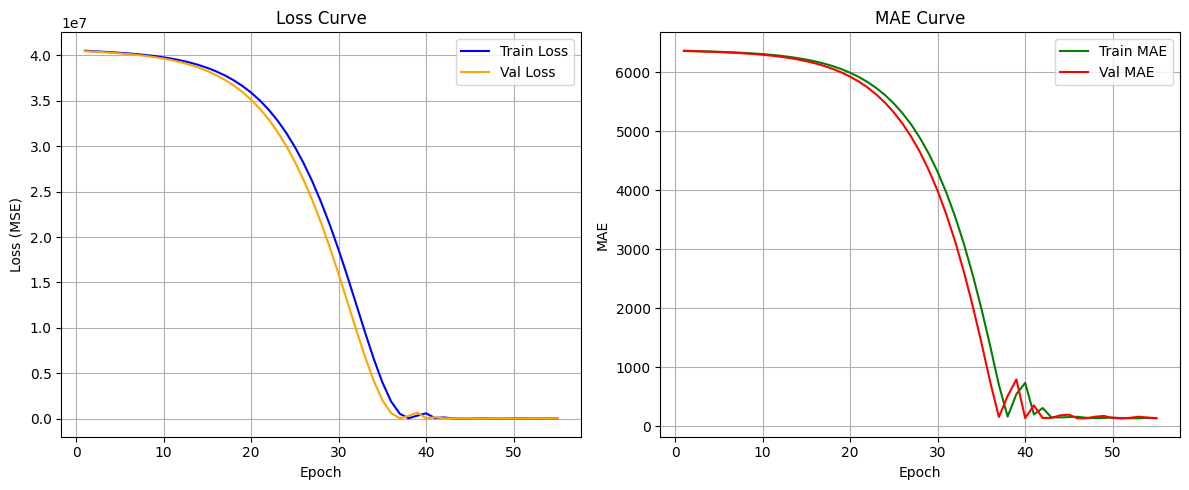

In [ ]:
model_M = SpatioTemporalDepthPredictor()
optimizer = torch.optim.Adam(model_M.parameters(), lr=0.001)
criterion = nn.MSELoss()

# modify the optimizer at the start of tyhe code
# train_losses, train_maes, train_mapes = train(model, dataloader, epochs=1000, lr=0.001)
# plot_training_curves(train_losses, train_maes)
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_M, train_loader_M, val_loader_M, epochs=55)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)


In [ ]:
model_M

SpatioTemporalDepthPredictor(
  (temporal_encoder): TemporalTransformer(
    (input_proj): Linear(in_features=1, out_features=128, bias=True)
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
          )
          (linear1): Linear(in_features=128, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=128, bias=True)
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (fc): Linear(in_features=128, out_features=64, bias=True)
  )
  (static_encoder): Linear(in_features=5,

## Training_Conrad

/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 44056393.8182 | MAE: 6635.0899 | MAPE: 99.96% || Val Loss: 43998384.6465 | MAE: 6630.7123 | MAPE: 99.89%
Epoch   2 | Train Loss: 43993627.3939 | MAE: 6630.3573 | MAPE: 99.89% || Val Loss: 43944856.2828 | MAE: 6626.6747 | MAPE: 99.83%
Epoch   3 | Train Loss: 43939559.2323 | MAE: 6626.2789 | MAPE: 99.83% || Val Loss: 43883489.2525 | MAE: 6622.0428 | MAPE: 99.76%
Epoch   4 | Train Loss: 43877359.3131 | MAE: 6621.5848 | MAPE: 99.76% || Val Loss: 43811257.2121 | MAE: 6616.5865 | MAPE: 99.68%
Epoch   5 | Train Loss: 43804092.8081 | MAE: 6616.0510 | MAPE: 99.67% || Val Loss: 43724799.1111 | MAE: 6610.0501 | MAPE: 99.58%
Epoch   6 | Train Loss: 43716241.4545 | MAE: 6609.4094 | MAPE: 99.57% || Val Loss: 43619355.1919 | MAE: 6602.0692 | MAPE: 99.46%
Epoch   7 | Train Loss: 43609308.9293 | MAE: 6601.3168 | MAPE: 99.45% || Val Loss: 43494359.5152 | MAE: 6592.5967 | MAPE: 99.32%
Epoch   8 | Train Loss: 43483242.2626 | MAE: 6591.7615 | MAPE: 99.31% || Val Loss: 43349173.0505 

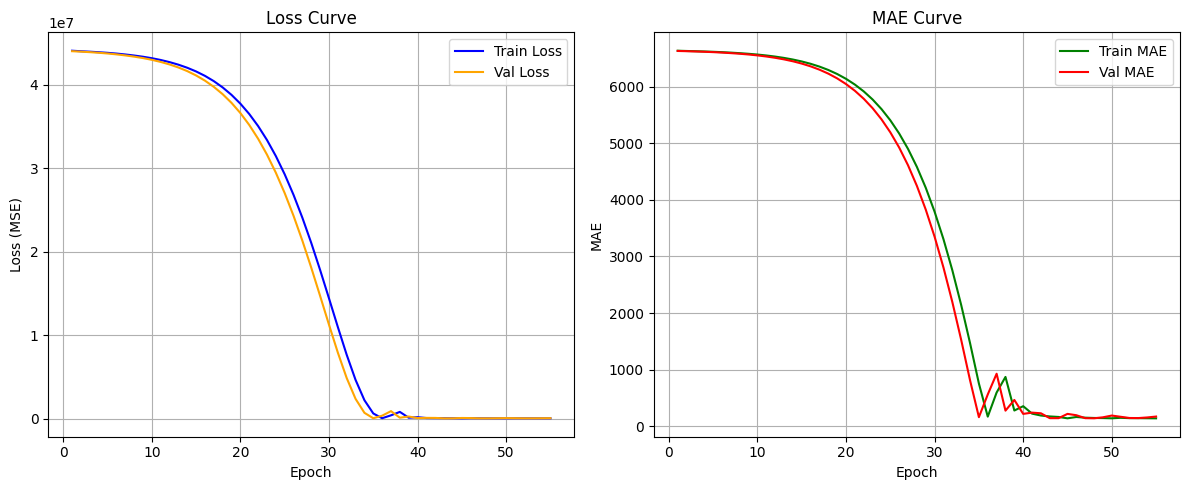

In [ ]:
model_C = SpatioTemporalDepthPredictor()
optimizer = torch.optim.Adam(model_M.parameters(), lr=0.001)
criterion = nn.MSELoss()

# modify the optimizer at the start of tyhe code
# train_losses, train_maes, train_mapes = train(model, dataloader, epochs=1000, lr=0.001)
# plot_training_curves(train_losses, train_maes)
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_C, train_loader_C, val_loader_C, epochs=55)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)


## Training_Sylvain

/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 43731098.2222 | MAE: 6610.5088 | MAPE: 100.02% || Val Loss: 43695433.6566 | MAE: 6607.8070 | MAPE: 99.98%
Epoch   2 | Train Loss: 43692800.9697 | MAE: 6607.6101 | MAPE: 99.98% || Val Loss: 43668274.4242 | MAE: 6605.7524 | MAPE: 99.95%
Epoch   3 | Train Loss: 43665692.4444 | MAE: 6605.5581 | MAPE: 99.95% || Val Loss: 43640523.5152 | MAE: 6603.6512 | MAPE: 99.92%
Epoch   4 | Train Loss: 43637840.4848 | MAE: 6603.4505 | MAPE: 99.92% || Val Loss: 43609921.4949 | MAE: 6601.3334 | MAPE: 99.89%
Epoch   5 | Train Loss: 43606997.2121 | MAE: 6601.1139 | MAPE: 99.88% || Val Loss: 43573772.6869 | MAE: 6598.5954 | MAPE: 99.84%
Epoch   6 | Train Loss: 43570242.7879 | MAE: 6598.3307 | MAPE: 99.84% || Val Loss: 43529036.6869 | MAE: 6595.2048 | MAPE: 99.79%
Epoch   7 | Train Loss: 43524749.7778 | MAE: 6594.8836 | MAPE: 99.79% || Val Loss: 43473097.6970 | MAE: 6590.9626 | MAPE: 99.73%
Epoch   8 | Train Loss: 43467938.3030 | MAE: 6590.5754 | MAPE: 99.72% || Val Loss: 43403561.5758

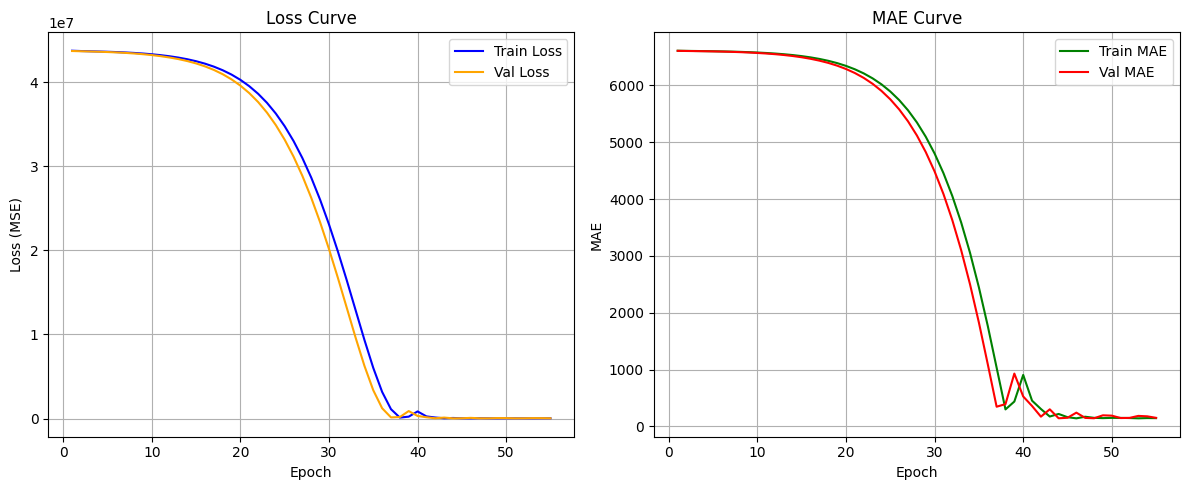

In [ ]:
model_S = SpatioTemporalDepthPredictor()
optimizer = torch.optim.Adam(model_M.parameters(), lr=0.001)
criterion = nn.MSELoss()

# modify the optimizer at the start of tyhe code
# train_losses, train_maes, train_mapes = train(model, dataloader, epochs=1000, lr=0.001)
# plot_training_curves(train_losses, train_maes)
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_S, train_loader_S, val_loader_S, epochs=55)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)


# test data

In [ ]:
#df_log = df_log.set_index('wellName')
#We first create downsample the gamma rays to per feet.
df_test_log100 = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Testdata/logs_100.parquet', engine='fastparquet')
df_test_log100.loc[df_test_log100['GR'] < -1, 'GR' ] = -1
df_test_loc100 = pd.read_parquet('/content/drive/MyDrive/SLB CRP/Data/Testdata/loc_100.parquet', engine='fastparquet')
df_test_loc100= df_test_loc100.reset_index()
df_test100 = df_test_loc100.merge(df_test_log100, how = 'inner', left_on = 'wellName', right_on = 'wellName')
df_log_test100=df_test100.copy()
df_log_test100.head()

,wellName,Latitude,Longitude,DEPTH,GR
0,512326026,48.756404,2.116624,477.0,76.5729
1,512326026,48.756404,2.116624,477.5,83.7471
2,512326026,48.756404,2.116624,478.0,89.9259
3,512326026,48.756404,2.116624,478.5,90.3770
4,512326026,48.756404,2.116624,479.0,89.9387


In [ ]:
df_tops_test100 = pd.read_csv('/content/drive/MyDrive/SLB CRP/Data/Testdata/tops_100.csv')
cols = ['MARCEL','CONRAD', 'SYLVAIN']
df_tops_test100.columns=['wellName', 'MARCEL','CONRAD', 'SYLVAIN']
df_tops_test100= df_tops_test100.set_index('wellName')
df_tops_test100 = df_tops_test100[cols]
df_tops_test100.dropna(inplace = True)
df_tops_test100.head()

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512326026,6530.0,6818.0,6791.0
512322735,6585.0,6871.0,6847.5
512326909,6240.0,6499.0,6472.0
512325828,6269.0,6529.0,6505.0
512330519,6236.0,6494.0,6471.0


In [ ]:
test_well_list = df_tops_test100.index.tolist()

## prediction for Marcel label

In [ ]:
test_dataset_M = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='MARCEL', split_ratio=0.2)

# train_graph, train_label = test_dataset_M[0]
# val_graph, val_label = test_dataset_M[1]

train_loader_M = DataLoader(test_dataset_M, batch_size=1, collate_fn=lambda batch: batch[0])
val_loader_M = DataLoader(test_dataset_M, batch_size=1, collate_fn=lambda batch: batch[0])

Well count for MARCEL: 100


/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 182620.3801 | MAE: 392.8193 | MAPE: 6.10% || Val Loss: 40012.7383 | MAE: 170.4420 | MAPE: 2.67%
Epoch   2 | Train Loss: 66780.6313 | MAE: 231.9854 | MAPE: 3.58% || Val Loss: 105134.4984 | MAE: 304.6701 | MAPE: 4.69%
Epoch   3 | Train Loss: 97526.0797 | MAE: 291.8983 | MAPE: 4.49% || Val Loss: 16920.0475 | MAE: 113.2574 | MAPE: 1.74%
Epoch   4 | Train Loss: 15571.2957 | MAE: 98.7041 | MAPE: 1.54% || Val Loss: 69154.2922 | MAE: 238.3865 | MAPE: 3.72%
Epoch   5 | Train Loss: 56413.7391 | MAE: 210.8897 | MAPE: 3.29% || Val Loss: 66635.2516 | MAE: 233.0471 | MAPE: 3.64%
Epoch   6 | Train Loss: 25729.7578 | MAE: 126.0635 | MAPE: 1.97% || Val Loss: 13378.9750 | MAE: 89.1204 | MAPE: 1.39%
Epoch   7 | Train Loss: 23812.2043 | MAE: 130.3504 | MAPE: 2.00% || Val Loss: 25358.5090 | MAE: 136.3524 | MAPE: 2.09%
Epoch   8 | Train Loss: 41141.1230 | MAE: 176.1343 | MAPE: 2.70% || Val Loss: 18688.9117 | MAE: 118.2377 | MAPE: 1.82%
Epoch   9 | Train Loss: 18519.3250 | MAE: 117.20

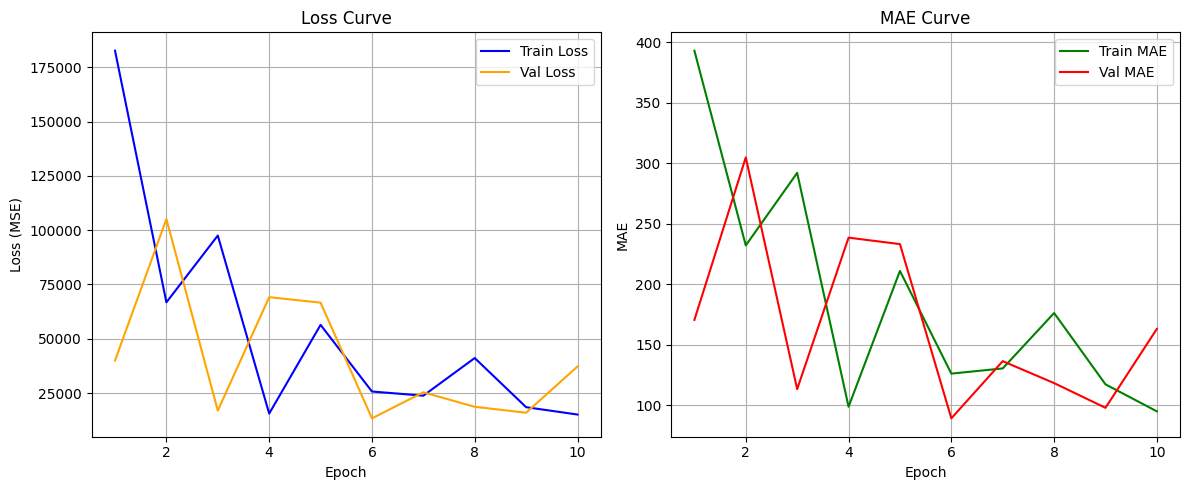

In [ ]:
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_M, train_loader_M, val_loader_M, epochs=10)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)

In [ ]:
test_dataset_M = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='MARCEL', split_ratio=1)
test_graph_M, test_label_M = test_dataset_M[0]
test_dataloader_M=DataLoader(test_dataset_M, batch_size=1, collate_fn=lambda batch: batch[0])

Well count for MARCEL: 100


In [ ]:
# print the result of testing model as an example
model_M.eval()
with torch.no_grad():
    for g_test, labels_test in test_dataloader_M:
        preds_test_M = model_M(g_test)
        labels_test_M = labels_test.to(preds_test_M.device)
        print('prediction:', preds_test_M)
        print('label:', labels_test_M)
        break

prediction: tensor([6545.3760, 6634.1753, 6634.1748, 6634.1743, 6600.8486, 6632.6997,
        6632.6943, 6632.1108, 6627.1030, 6627.0688, 6589.3579, 6609.7603,
        6609.7993, 6635.7690, 6635.7710, 6635.7715, 6624.6001, 6624.5991,
        6624.5942, 6620.6128, 6620.7773, 6620.9214, 6625.6265, 6625.6592,
        6625.6919, 6558.3882, 6627.2344, 6627.2075, 6627.1787, 6593.9097,
        6633.0151, 6632.9712, 6632.9258, 6598.9985, 6582.4272, 6616.6895,
        6616.5469, 6631.6597, 6631.6909, 6631.7021, 6628.3667, 6628.3403,
        6628.3135, 6632.0776, 6632.1279, 6632.7822, 6633.2100, 6633.1685,
        6618.1943, 6624.8706, 6625.7671, 6627.0254, 6627.7456, 6620.1006,
        6620.8569, 6621.2837, 6580.7803, 6634.4336, 6634.0933, 6633.6294,
        6611.0732, 6593.9678, 6618.6831, 6619.0176, 6619.0103, 6608.3335,
        6617.2964, 6617.1772, 6615.9829, 6600.7231, 6567.8511, 6603.1509,
        6603.1470, 6625.8052, 6625.3784, 6624.1099, 6617.7808, 6616.8643,
        6586.7144, 6634.99

In [ ]:
df_tops_test100.head(3)

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512326026,6530.0,6818.0,6791.0
512322735,6585.0,6871.0,6847.5
512326909,6240.0,6499.0,6472.0


## prediction for Conrva

In [ ]:
test_dataset_C = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='CONRAD', split_ratio=0.2)

# train_graph, train_label = test_dataset_M[0]
# val_graph, val_label = test_dataset_M[1]

train_loader_C = DataLoader(test_dataset_C, batch_size=1, collate_fn=lambda batch: batch[0]) # Changed from test_dataset_M to test_dataset_C
val_loader_C = DataLoader(test_dataset_C, batch_size=1, collate_fn=lambda batch: batch[0]) # Changed from test_dataset_M to test_dataset_C

Well count for CONRAD: 100


/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 106532.2688 | MAE: 217.2306 | MAPE: 3.23% || Val Loss: 274406.8125 | MAE: 511.1188 | MAPE: 7.63%
Epoch   2 | Train Loss: 212200.2313 | MAE: 446.0042 | MAPE: 6.66% || Val Loss: 168612.7781 | MAE: 394.2684 | MAPE: 5.89%
Epoch   3 | Train Loss: 37499.5125 | MAE: 146.5012 | MAPE: 2.20% || Val Loss: 19050.0242 | MAE: 118.2877 | MAPE: 1.75%
Epoch   4 | Train Loss: 86020.9312 | MAE: 266.6573 | MAPE: 3.93% || Val Loss: 66022.8859 | MAE: 230.7436 | MAPE: 3.40%
Epoch   5 | Train Loss: 77509.5203 | MAE: 253.8093 | MAPE: 3.74% || Val Loss: 16605.4984 | MAE: 110.7665 | MAPE: 1.64%


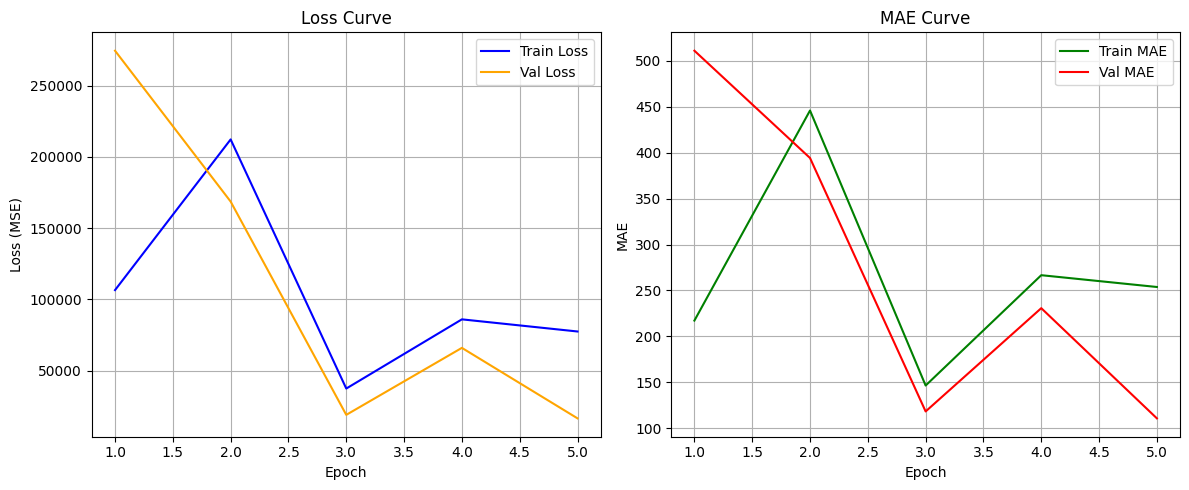

In [ ]:
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_C, train_loader_C, val_loader_C, epochs=5)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)

In [ ]:
test_dataset_C = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='CONRAD', split_ratio=1)
test_graph_C, test_label_C = test_dataset_C[0]
test_dataloader_C=DataLoader(test_dataset_C, batch_size=1, collate_fn=lambda batch: batch[0])

Well count for CONRAD: 100


In [ ]:
# print the result of testing model as an example
model_C.eval()
with torch.no_grad():
    for g_test, labels_test in test_dataloader_C:
        preds_test_C = model_C(g_test)
        labels_test_C = labels_test.to(preds_test_C.device)
        print('prediction:', preds_test_C)
        print('label:', labels_test_C)
        break

prediction: tensor([6545.3760, 6634.1753, 6634.1748, 6634.1743, 6600.8486, 6632.6997,
        6632.6943, 6632.1108, 6627.1030, 6627.0688, 6589.3579, 6609.7603,
        6609.7993, 6635.7690, 6635.7710, 6635.7715, 6624.6001, 6624.5991,
        6624.5942, 6620.6128, 6620.7773, 6620.9214, 6625.6265, 6625.6592,
        6625.6919, 6558.3882, 6627.2344, 6627.2075, 6627.1787, 6593.9097,
        6633.0151, 6632.9712, 6632.9258, 6598.9985, 6582.4272, 6616.6895,
        6616.5469, 6631.6597, 6631.6909, 6631.7021, 6628.3667, 6628.3403,
        6628.3135, 6632.0776, 6632.1279, 6632.7822, 6633.2100, 6633.1685,
        6618.1943, 6624.8706, 6625.7671, 6627.0254, 6627.7456, 6620.1006,
        6620.8569, 6621.2837, 6580.7803, 6634.4336, 6634.0933, 6633.6294,
        6611.0732, 6593.9678, 6618.6831, 6619.0176, 6619.0103, 6608.3335,
        6617.2964, 6617.1772, 6615.9829, 6600.7231, 6567.8511, 6603.1509,
        6603.1470, 6625.8052, 6625.3784, 6624.1099, 6617.7808, 6616.8643,
        6586.7144, 6634.99

/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In [ ]:
df_tops_test100.head(7)

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512326026,6530.0,6818.0,6791.0
512322735,6585.0,6871.0,6847.5
512326909,6240.0,6499.0,6472.0
512325828,6269.0,6529.0,6505.0
512330519,6236.0,6494.0,6471.0
512325280,6487.0,6743.0,6719.0
512326560,6360.0,6628.0,6605.0


In [ ]:
test_well_list[:5]

[512326026, 512322735, 512326909, 512325828, 512330519]

## prediction for Sylvain

In [ ]:
test_dataset_S = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='SYLVAIN', split_ratio=0.2)


train_loader_S = DataLoader(test_dataset_S, batch_size=1, collate_fn=lambda batch: batch[0])
val_loader_S = DataLoader(test_dataset_S, batch_size=1, collate_fn=lambda batch: batch[0])

Well count for SYLVAIN: 100


/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch   1 | Train Loss: 286026.7512 | MAE: 491.4443 | MAPE: 7.35% || Val Loss: 71266.4703 | MAE: 240.4429 | MAPE: 3.62%
Epoch   2 | Train Loss: 100325.7563 | MAE: 290.5747 | MAPE: 4.32% || Val Loss: 142611.7594 | MAE: 359.4065 | MAPE: 5.33%
Epoch   3 | Train Loss: 151345.4813 | MAE: 371.2734 | MAPE: 5.51% || Val Loss: 22099.2336 | MAE: 128.2973 | MAPE: 1.90%
Epoch   4 | Train Loss: 17321.8289 | MAE: 102.3579 | MAPE: 1.53% || Val Loss: 88620.5234 | MAE: 274.1785 | MAPE: 4.12%
Epoch   5 | Train Loss: 69596.6500 | MAE: 237.1111 | MAPE: 3.57% || Val Loss: 130256.5250 | MAE: 341.7777 | MAPE: 5.13%
Epoch   6 | Train Loss: 48294.4641 | MAE: 187.5056 | MAPE: 2.83% || Val Loss: 36751.9773 | MAE: 160.7190 | MAPE: 2.42%
Epoch   7 | Train Loss: 18308.1945 | MAE: 112.4757 | MAPE: 1.68% || Val Loss: 16664.8600 | MAE: 111.0322 | MAPE: 1.65%
Epoch   8 | Train Loss: 49284.3887 | MAE: 194.6958 | MAPE: 2.88% || Val Loss: 25185.1879 | MAE: 136.5420 | MAPE: 2.02%
Epoch   9 | Train Loss: 40777.9047 | MAE: 1

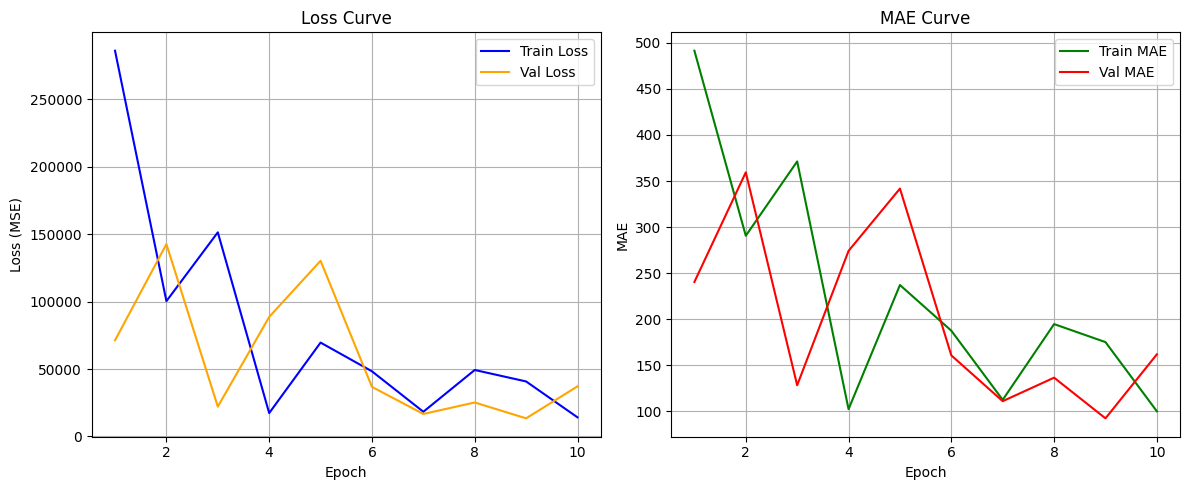

In [ ]:
train_losses, train_maes, train_mapes, val_losses, val_maes, val_mapes = train(model_S, train_loader_S, val_loader_S, epochs=10)
plot_training_curves(train_losses, train_maes, val_losses, val_maes)

In [ ]:
test_dataset_S = WellLogMarkerDataset(df_log=df_log_test100, df_tops=df_tops_test100,marker='SYLVAIN', split_ratio=1)
test_graph_S, test_label_S = test_dataset_S[0]
test_dataloader_S=DataLoader(test_dataset_S, batch_size=1, collate_fn=lambda batch: batch[0])

Well count for SYLVAIN: 100


In [ ]:
# print the result of testing model as an example
model_S.eval()
with torch.no_grad():
    for g_test, labels_test in test_dataloader_S:
        preds_test_S = model_S(g_test)
        labels_test_S = labels_test.to(preds_test_S.device)
        print('prediction:', preds_test_S)
        print('label:', labels_test_S)
        break


prediction: tensor([6849.7612, 6861.8818, 6867.6821, 6868.5347, 6869.7959, 6870.2075,
        6870.2075, 6871.7046, 6871.7046, 6871.5156, 6865.9321, 6865.9321,
        6822.9946, 6822.6606, 6856.3096, 6864.1743, 6864.4673, 6866.0386,
        6869.0386, 6869.6089, 6849.6172, 6836.6606, 6857.4692, 6857.4683,
        6857.4678, 6872.8159, 6872.7876, 6872.9175, 6873.2993, 6873.4199,
        6850.0151, 6860.8652, 6860.8667, 6860.8677, 6839.7485, 6880.7114,
        6880.7114, 6880.7104, 6858.1089, 6857.9297, 6853.8481, 6827.4819,
        6837.0244, 6838.6221, 6842.5112, 6843.0972, 6841.2295, 6841.6123,
        6871.1240, 6871.1235, 6873.0679, 6873.3081, 6869.4976, 6875.2896,
        6875.3818, 6826.0518, 6826.1196, 6867.4287, 6867.4287, 6869.3403,
        6869.3276, 6868.6582, 6868.6060, 6868.6128, 6868.6011, 6868.5894,
        6843.7656, 6838.9648, 6871.1650, 6871.1650, 6871.1650, 6829.7998,
        6829.9434, 6837.6167, 6839.5259, 6839.8706, 6839.8677, 6835.3237,
        6869.5674, 6872.50

/usr/local/lib/python3.11/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


## Calculate the recall

In [ ]:
# create dataframe
well_name=test_well_list
marcel_data=preds_test_M.tolist()
conrad_data=preds_test_C.tolist()
sylvain_data=preds_test_S.tolist()

df_pred=pd.DataFrame({'wellName':well_name,'MARCEL':marcel_data,'CONRAD':conrad_data,'SYLVAIN':sylvain_data})
df_pred.head()

,wellName,MARCEL,CONRAD,SYLVAIN
0,512326026,6545.375977,6619.729004,6849.761230
1,512322735,6634.175293,6680.729980,6861.881836
2,512326909,6634.174805,6680.729980,6867.682129
3,512325828,6634.174316,6680.729004,6868.534668
4,512330519,6600.848633,6626.578613,6869.795898


In [ ]:
df_pred.set_index('wellName',inplace=True)
df_pred=df_pred.sort_index()
df_pred

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512320966,6627.178711,6678.929199,6873.299316
512320967,6611.073242,6658.714844,6869.327637
512320981,6608.333496,6679.859863,6868.589355
512320982,6627.234375,6678.866211,6872.787598
512322244,6634.994629,6665.061035,6872.881348
...,...,...,...
512330517,6579.752930,6672.385254,6855.200684
512330518,6627.025391,6681.528809,6873.308105
512330519,6600.848633,6626.578613,6869.795898


In [ ]:
def recall_tops(df_tops_true, df_tops_pred, tolerance = 10):

    if set(df_tops_true.columns) == set(df_tops_pred.columns) :
        concat_df = df_tops_true.copy()
        for col in df_tops_pred.columns:
            concat_df[col+"_pred"] = df_tops_pred[col]
        tp = 0
        p = 0
        mae = 0
        for col in df_tops_true:
            diffname = "{0}_ae".format(col)
            tpname = "{0}_tp".format(col)
            p += concat_df[col].count()
            concat_df[diffname] = concat_df[col]-concat_df[str(col + "_pred")]
            concat_df[diffname] = concat_df[diffname].abs()
            concat_df[tpname] = concat_df[diffname] <= tolerance
            tp += concat_df[tpname].sum()
            mae += concat_df[diffname].sum()
        return tp/p, mae/p, concat_df
    else :
        print("the tops columns are not valid")
    return None,None,None

In [ ]:
recall, mae, df_res = recall_tops(df_tops_test100,df_pred,tolerance = 20)
print("recall {0}, mae {1}".format(recall,mae))
df_res

recall 0.043333333333333335, mae 145.42427897135417


,MARCEL,CONRAD,SYLVAIN,MARCEL_pred,CONRAD_pred,SYLVAIN_pred,MARCEL_ae,MARCEL_tp,CONRAD_ae,CONRAD_tp,SYLVAIN_ae,SYLVAIN_tp
wellName,,,,,,,,,,,,
512326026,6530.0,6818.0,6791.0,6545.375977,6619.729004,6849.761230,15.375977,True,198.270996,False,58.761230,False
512322735,6585.0,6871.0,6847.5,6634.175293,6680.729980,6861.881836,49.175293,False,190.270020,False,14.381836,True
512326909,6240.0,6499.0,6472.0,6634.174805,6680.729980,6867.682129,394.174805,False,181.729980,False,395.682129,False
512325828,6269.0,6529.0,6505.0,6634.174316,6680.729004,6868.534668,365.174316,False,151.729004,False,363.534668,False
512330519,6236.0,6494.0,6471.0,6600.848633,6626.578613,6869.795898,364.848633,False,132.578613,False,398.795898,False
...,...,...,...,...,...,...,...,...,...,...,...,...
512322532,6338.0,6609.0,6583.0,6610.103516,6649.658691,6868.619629,272.103516,False,40.658691,False,285.619629,False
512323102,6508.0,6772.0,6746.0,6610.058105,6678.927246,6868.599609,102.058105,False,93.072754,False,122.599609,False
512330486,6414.5,6693.0,6669.0,6597.037598,6678.924316,6876.677246,182.537598,False,14.075684,True,207.677246,False
